# Problem Statement
* Task 1:- Prepare a complete data analysis report on the given data.
* Task 2:- Prediction of daily bike rental count based on the environmental and
seasonal settings.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [ ]:
day=pd.read_csv('day.csv')
hr=pd.read_csv('hour.csv')
#typecast datetime columns to date
day['dteday']=pd.to_datetime(day['dteday'])
hr['dteday']=pd.to_datetime(hr['dteday'])

### Basic check

In [ ]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
day.shape

(731, 16)

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
#check for duplicates
day.duplicated().sum()

np.int64(0)

In [ ]:
# hr


In [ ]:
hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hr.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [ ]:
hr.shape


(17379, 17)

In [ ]:
hr.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
hr.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Data Analysis Report
* Dataset Overview
    * Rows: 731 (Daily data for 2 years: 2011 & 2012)
    * Columns: 16, including:
       * instant: record index
       * dteday: Date
       * season:categorical(1:winter,2:spring,3:summer,4:fall)
       * yr:year(0:2011,1:2012)
       * mnth:month(1 to 12)
       * hr:hour(0 to 23)
       * holiday:weather day is holiday or not
       * weekday:day of week
       * workingly:if neither weekend nor holiday,it is 1 ;otherwise 0
       * weathersit:
           * 1:Clear,Few clouds,Partly cloudy
           * 2:Mist+Cloudy,Mist+Broken clouds
           * 3:Light Snow
           * 4:Heavy Rain
       * temp:Normalized temperature in Celsius.
       * atemp: Normalized feeling temperature in Celsius.
       * hum: Normalized humidity.
       * windspeed: Normalized wind speed.
       * casual: count of casual users
       * registered: count of registered users
       * cnt: count of total(casual+register)
* Data cleaning
    * This dataset has no missing values.
* EDA

## EDA

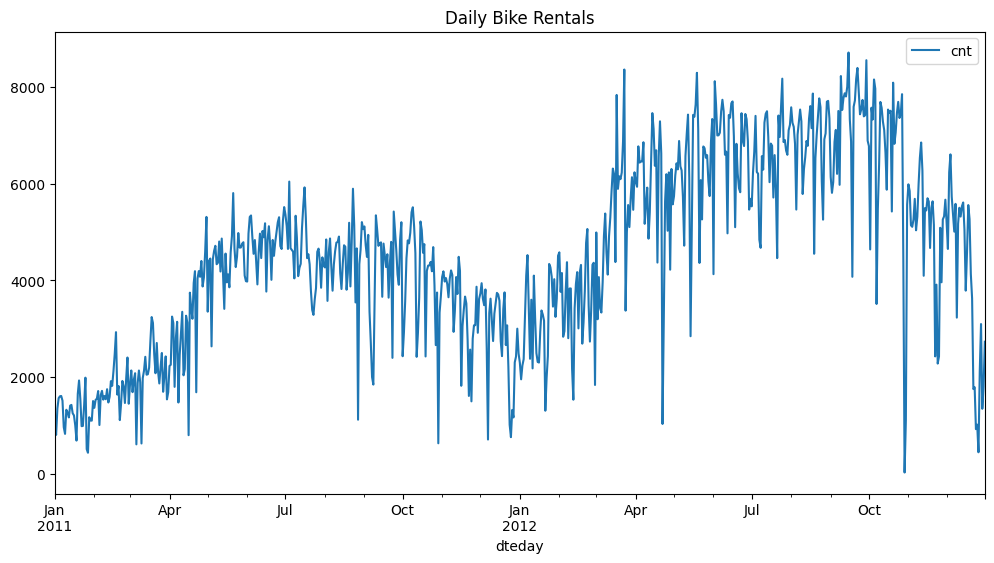

In [ ]:
#Bike Rentals over time
day.plot(x='dteday', y='cnt', figsize=(12,6), title='Daily Bike Rentals')
plt.show()

* Insight:
   * It can be observed that bike rentals in 2012 is more as compared to 2011.

<Axes: xlabel='season', ylabel='cnt'>

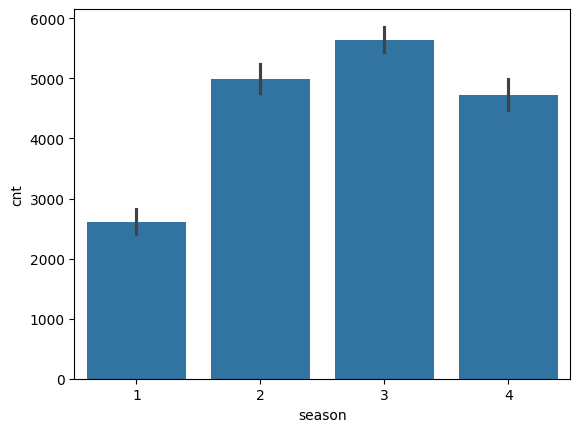

In [ ]:
#count by season
sns.barplot(x='season', y='cnt', data=day)

<Axes: >

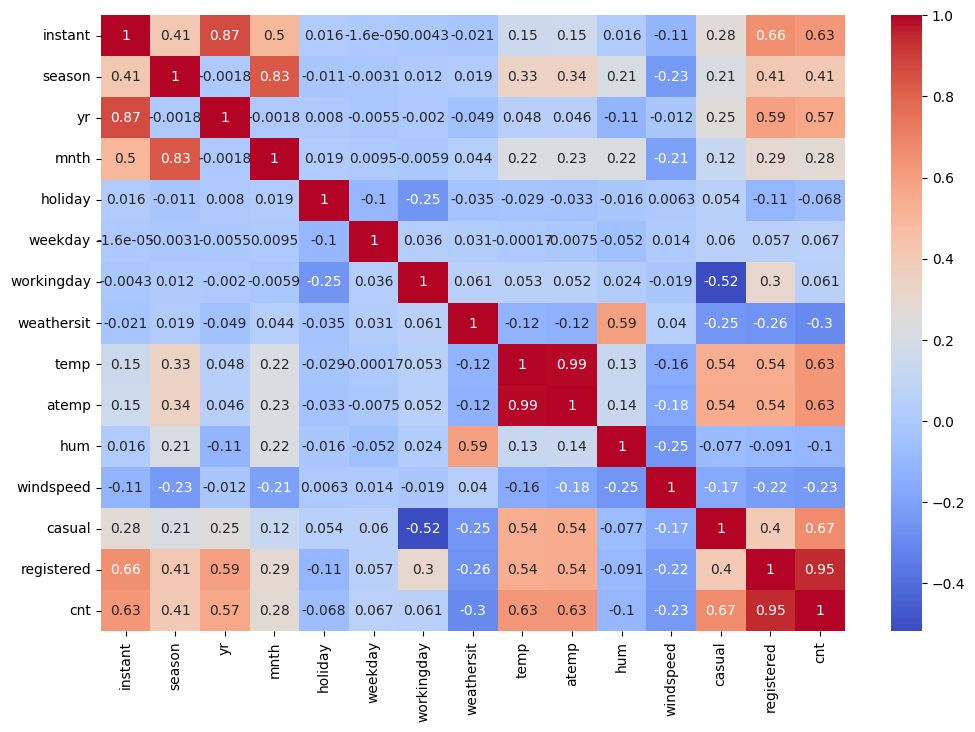

In [ ]:
#Correlation Heatmap
numeric_df = day.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

* Insights
  * Count is high in spring and summer.
  * Weathersit,hum,windspeed negatively correlated.

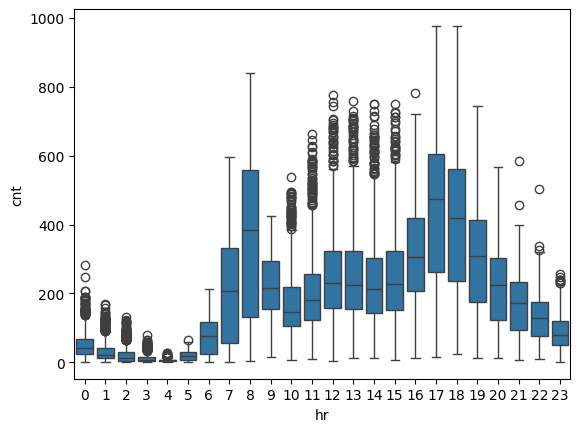

In [ ]:
# visualizing bile per hour
sns.boxplot(data=hr,x='hr', y='cnt')
plt.show()

* Insights:
    * The peak in the number of bikes can be observed at the start and end of the working hours, as most people commute to offices via bikes. However the number of bikes rented decrease in the evening due to cold weather.

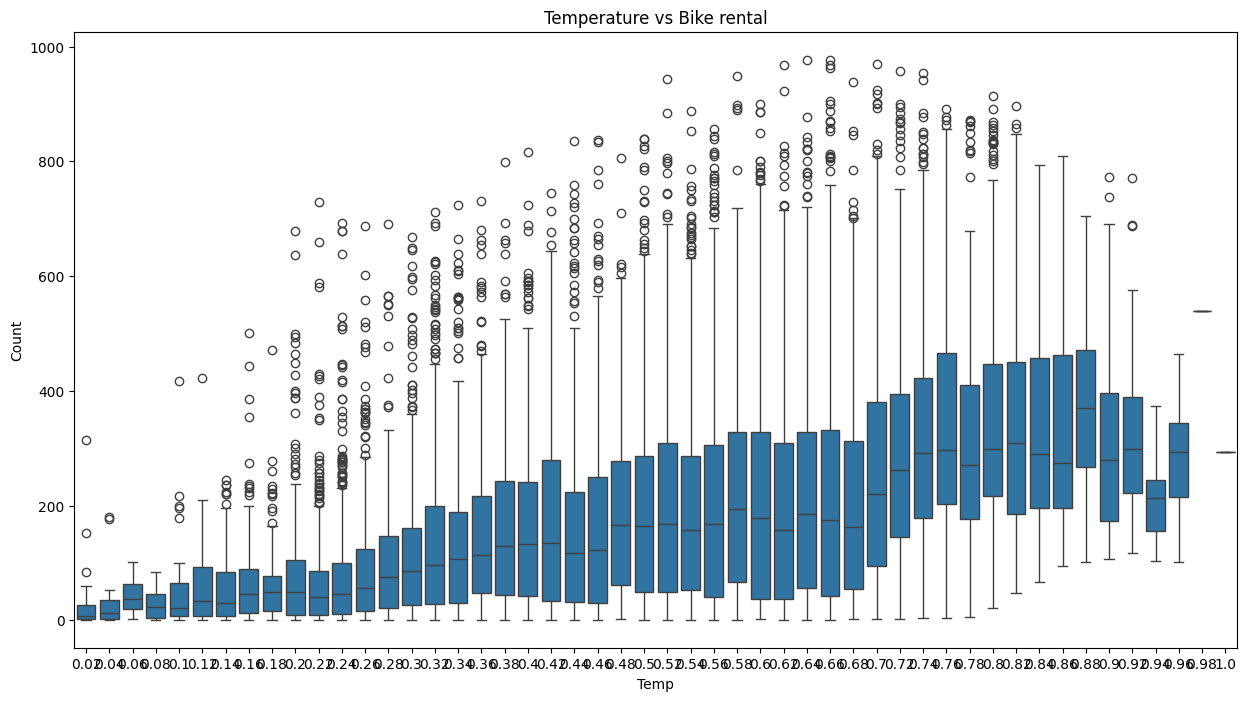

In [149]:
# Visualizing impact of temperature on bike rental.
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(x='temp',y='cnt',data=hr)
plt.title("Temperature vs Bike rental")
plt.xlabel("Temp")
plt.ylabel("Count")
plt.show()

* insight   
   * from the above plot, it is clear that the bike rentals increase in warm weather. However bike rentals decrease if the weather is too hot i.e above 0.8.

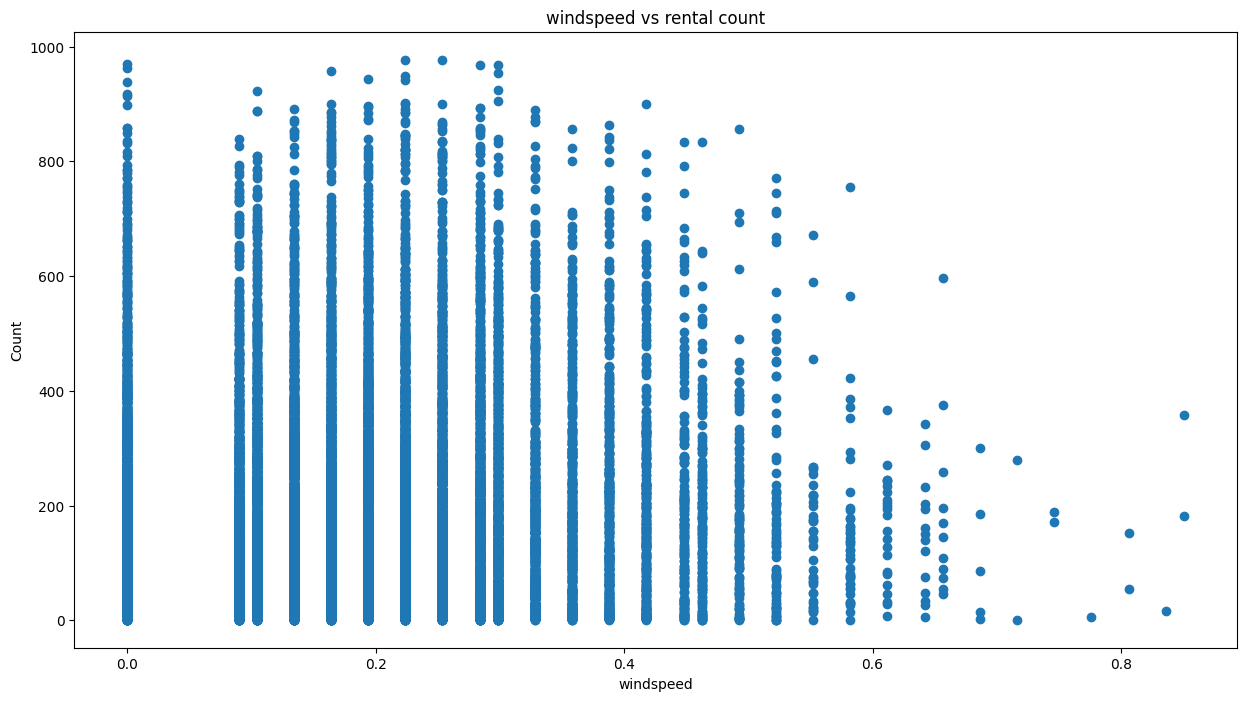

In [148]:
# Visualizing windspeed vs rental count of bike
fig,ax=plt.subplots(figsize=(15,8))
plt.scatter(x='windspeed',y='cnt',data=hr)
plt.title("windspeed vs rental count")
plt.xlabel("windspeed")
plt.ylabel("Count")
plt.show()

* Insights
   * As expected, higher wind speed is not a favorable condition for renting bikes.
      
On the contrary, lower windspeed leads to pleasant warmer weather and hence more bike rentals.

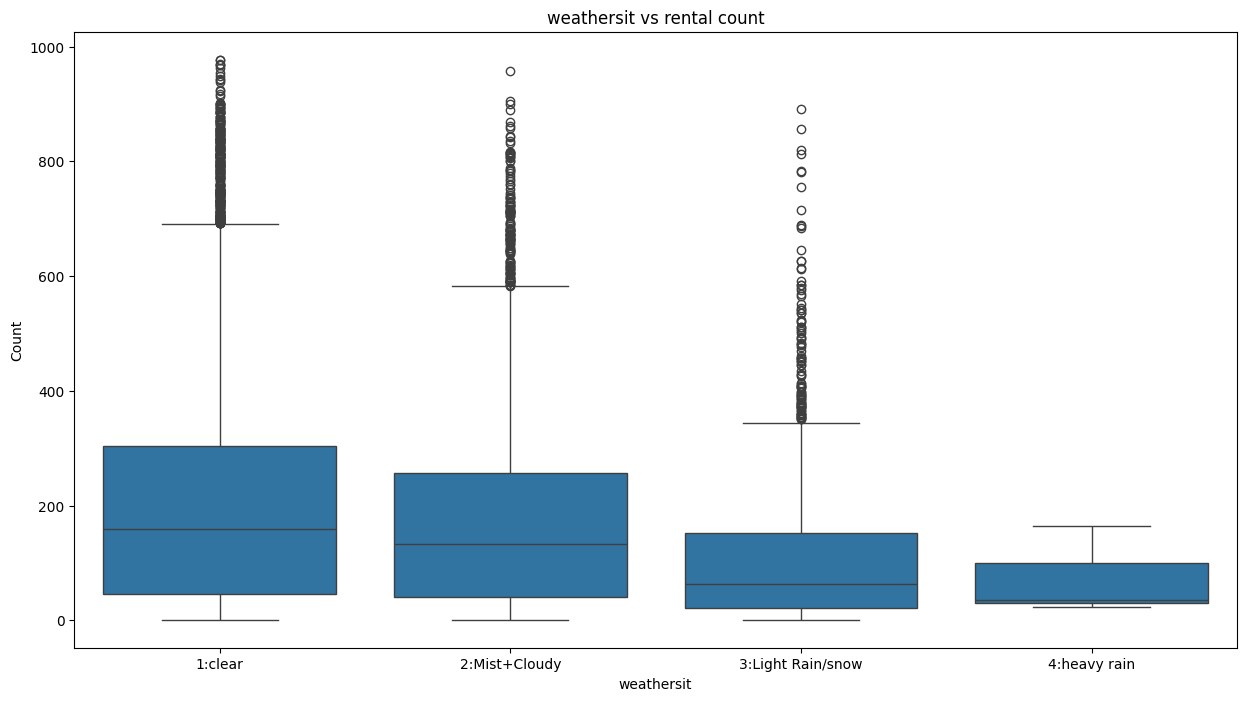

In [150]:
# Visualizing Weather situation vs bike rentals.
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(x='weathersit',y='cnt',data=hr)
plt.title("weathersit vs rental count")
plt.xlabel("weathersit")
plt.xticks(np.arange(4),('1:clear','2:Mist+Cloudy','3:Light Rain/snow','4:heavy rain'))
plt.ylabel("Count")
plt.show()

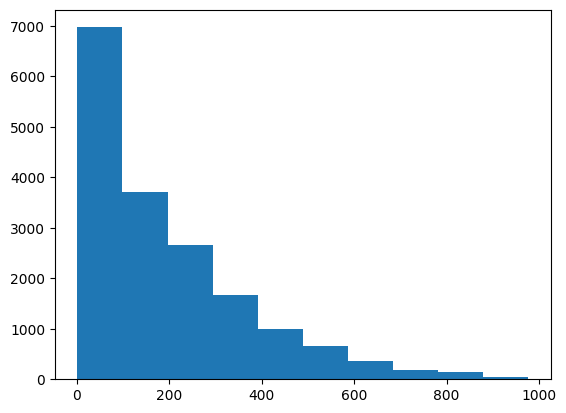

In [ ]:
# Plotting the distribution of the dependent variable
plt.hist(hr.loc[:,'cnt'])
plt.show()

* Insights:
    * It can be observed that target variable is right skewed. In most of the machine learning problem gaussian distribution of the data is desireable.

# Data Processing

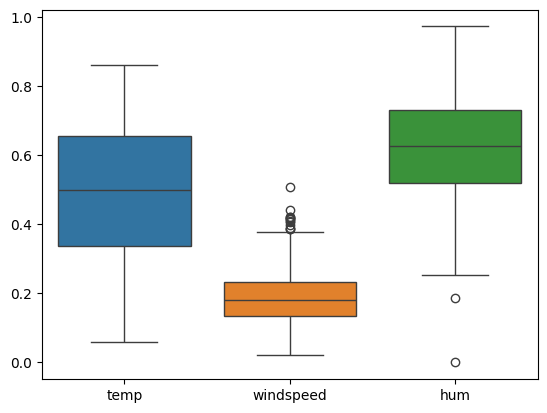

In [ ]:
#checking for Outliers
sns.boxplot(data=day[['temp','windspeed','hum']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

* Insights
   * From the box plot, we can observed that no outliers are present in normalized temp but few outliers are present in normalized windspeed and humidity variable.

In [ ]:
day.windspeed.skew()

np.float64(0.6773454211095378)

In [ ]:
day.hum.skew()

np.float64(-0.06978343399095213)

In [ ]:
## for windspeed
#using IQR method
Q1=day['windspeed'].quantile(0.25)
print('Q1',Q1)
Q3=day['windspeed'].quantile(0.75)
print('Q3',Q3)
IQR=Q3-Q1
print('IQR',IQR)

Q1 0.13495
Q3 0.2332145
IQR 0.0982645


In [ ]:
lwr_lmt=Q1-1.5*IQR
print('lower limit',lwr_lmt)
upr_lmt=Q3+1.5*IQR
print('upper limit',upr_lmt)

lower limit -0.012446750000000034
upper limit 0.38061125


In [ ]:
day.loc[day['windspeed']<lwr_lmt]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [ ]:
day.loc[day['windspeed']>upr_lmt]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
93,94,2011-04-04,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115
94,95,2011-04-05,2,0,4,0,2,1,2,0.414167,0.398350,0.642083,0.388067,167,1628,1795
292,293,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195
382,383,2012-01-18,1,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376
407,408,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
420,421,2012-02-25,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732
432,433,2012-03-08,1,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382
433,434,2012-03-09,1,1,3,0,5,1,2,0.410833,0.397083,0.407083,0.414800,447,4122,4569


In [ ]:
len(day.loc[day['windspeed']>upr_lmt])/len(day)

0.017783857729138167

In [ ]:
day.loc[day['windspeed']>upr_lmt]=day['windspeed'].mean()

In [ ]:
day.loc[day['windspeed']>upr_lmt]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [ ]:
## for humidity
#using IQR method
Q1=day['hum'].quantile(0.25)
print('Q1',Q1)
Q3=day['hum'].quantile(0.75)
print('Q3',Q3)
IQR=Q3-Q1
print('IQR',IQR)

Q1 0.5185055000000001
Q3 0.7302085
IQR 0.21170299999999997


In [ ]:
lwr_lmt=Q1-1.5*IQR
print('lower limit',lwr_lmt)
upr_lmt=Q3+1.5*IQR
print('upper limit',upr_lmt)

lower limit 0.2009510000000001
upper limit 1.047763


In [ ]:
day.loc[day['hum']>upr_lmt]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [ ]:
day.loc[day['hum']<lwr_lmt]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486
49,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486
68,69.000000,2011-03-10 00:00:00,1.000000,0.000000,3.000000,0.000000,4.000000,1.000000,3.000000,0.389091,0.385668,0.000000,0.261877,46.000000,577.000000,623.000000
93,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486
94,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486
292,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486
382,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486
407,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486
420,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486
432,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486,0.190486


In [ ]:
len(day.loc[day['hum']<lwr_lmt])/len(day)

0.019151846785225718

In [ ]:
day.loc[day['hum']<lwr_lmt]=day['hum'].mean()

In [ ]:
day.loc[day['hum']<lwr_lmt]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


# Feature Engineering

In [ ]:
# categorical & numerical columns
numerical_cols=day.select_dtypes(include=['int64','float64']).columns
print('numerical_cols::',numerical_cols)
#categorical_cols=day.select_dtypes(include=['object','category']).columns
#print('categorical_cols::',categorical_cols)


numerical_cols:: Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


In [ ]:
# convert date to datetime and extract parts
day['dteday']=pd.to_datetime(day['dteday'])
day['year'] = day['dteday'].dt.year
day['month'] = day['dteday'].dt.month
day['weekday'] = day['dteday'].dt.weekday


In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
day=pd.get_dummies(day,drop_first=True)

In [ ]:

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,5,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,2011,1
1,2.0,2011-01-02,1.0,0.0,1.0,0.0,6,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,2011,1
2,3.0,2011-01-03,1.0,0.0,1.0,0.0,0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,2011,1
3,4.0,2011-01-04,1.0,0.0,1.0,0.0,1,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,2011,1
4,5.0,2011-01-05,1.0,0.0,1.0,0.0,2,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,2011,1


In [ ]:
#scale temp,hum,widspeed
num_col=['temp','hum','windspeed']
scaler=StandardScaler()
num_scale=scaler.fit_transform(day[num_col])
num_scale=pd.DataFrame(num_scale,columns=num_col,index=day.index)
num_scale.head()

,temp,hum,windspeed
0,-0.852445,1.265952,-0.368212
1,-0.746651,0.469488,0.580191
2,-1.662168,-1.408813,0.577715
3,-1.642249,-0.297264,-0.369827
4,-1.494568,-1.411106,-0.083410


In [ ]:
x_processed=pd.concat([day.drop(columns=num_col),num_scale],axis=1)
x_processed.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,casual,registered,cnt,year,month,temp,hum,windspeed
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,5,0.0,2.0,0.363625,331.0,654.0,985.0,2011,1,-0.852445,1.265952,-0.368212
1,2.0,2011-01-02,1.0,0.0,1.0,0.0,6,0.0,2.0,0.353739,131.0,670.0,801.0,2011,1,-0.746651,0.469488,0.580191
2,3.0,2011-01-03,1.0,0.0,1.0,0.0,0,1.0,1.0,0.189405,120.0,1229.0,1349.0,2011,1,-1.662168,-1.408813,0.577715
3,4.0,2011-01-04,1.0,0.0,1.0,0.0,1,1.0,1.0,0.212122,108.0,1454.0,1562.0,2011,1,-1.642249,-0.297264,-0.369827
4,5.0,2011-01-05,1.0,0.0,1.0,0.0,2,1.0,1.0,0.229270,82.0,1518.0,1600.0,2011,1,-1.494568,-1.411106,-0.083410


In [ ]:
#Features(droping  ID & highly correlated)
x=x_processed.drop(columns=['instant','dteday','atemp','casual','registered','cnt'])
y=x_processed['cnt']
x.columns
x=x.drop(columns='year')
x.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'month', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [ ]:
# Training and testing data creation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y_train.shape

(584,)

In [ ]:
x_train.shape

(584, 11)

In [ ]:
# creating model Linear Regression
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predict=LR.predict(x_test)

In [ ]:
y_test.shape

(147,)

In [ ]:
y_predict

array([6.21214221e+03, 1.63636776e+03, 3.02079334e+03, 4.54826927e+03,
       6.73127556e+03, 7.27362320e+03, 8.85642833e+02, 2.05413338e+03,
       7.11366365e+03, 6.47924909e+03, 3.35761085e+03, 2.10625921e+03,
       4.07326988e+03, 5.51153629e+03, 2.46375442e+03, 2.31232943e+03,
       2.49456764e+03, 7.30587120e+03, 5.68919609e+03, 2.98810680e+03,
       7.25382559e+03, 8.07692850e+03, 5.12503310e+03, 1.67457399e+03,
       1.37881912e+03, 4.81902710e+03, 1.97503869e+03, 6.81171671e+03,
       4.09695730e+03, 5.85179025e+03, 3.26315095e+03, 4.02148743e+03,
       5.91952212e+03, 6.29241774e+03, 5.46140681e+03, 4.67897154e+03,
       6.80992553e+03, 5.93556318e+03, 3.10421185e+03, 1.00246305e+03,
       4.04382348e+03, 4.09680094e+03, 7.22209878e+03, 3.71392476e+03,
       7.32458070e+03, 2.24057992e+03, 5.21577267e+03, 5.10002467e+03,
       5.96803153e+03, 4.30916735e+03, 3.38452441e+03, 3.02827134e+03,
       1.83491696e+03, 5.70217453e+03, 5.00647772e+03, 4.18999082e+03,
      

In [ ]:
# Linear Regression Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score_lr=r2_score(y_test,y_predict)

In [ ]:
r2_score_lr

0.8342420358128945

In [ ]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

614.9602919861846

In [ ]:
#MSE
MSE=mean_squared_error(y_test,y_predict)
MSE

691661.8721071128

In [ ]:
#RMSE
rmse=np.sqrt(MSE)
rmse

np.float64(831.6621141467926)

In [ ]:
# Hyperparameter Tuning for linear Regression

from sklearn.model_selection import GridSearchCV,cross_val_score

param_grid={'copy_X':[True,False],'fit_intercept':[True,False],'n_jobs':[1,5,10,15,None],'positive':[True,False]}
grid_search=GridSearchCV(estimator=LR,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)
print(f"Best parameters:{grid_search.best_params_}")
print(f"Best Score:{grid_search.best_score_}")
cross_val_score=cross_val_score(grid_search,x,y,cv=10)
print(f"CrossValidation Score:{cross_val_score}")
print('Model accuracy: ',np.mean(cross_val_score))

Best parameters:{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score:0.7894527027724049
CrossValidation Score:[ 0.33995944  0.52009882 -2.91272547  0.55346027  0.56040913  0.50163653
  0.30961547 -0.76825175 -0.09048301  0.47436237]
Model accuracy:  -0.05119182170392848


In [ ]:
# adjusted R2 score
adj_r2=1-(1-0.8361126844043344)*(147-1)/(147-15-1)
adj_r2

0.8173469612445253

In [ ]:
#Applying Decisicion Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y.predict=dt.predict(x_test)

In [ ]:
#Evaluation Decision Tree Regressor
from sklearn.metrics import r2_score
r2_score_dt=r2_score(y_test,y_predict)
r2_score_dt

0.8342420358128937

In [ ]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

614.9602919861846

In [ ]:
MSE=mean_squared_error(y_test,y_predict)
MSE

691661.8721071128

In [ ]:
rmse=np.sqrt(MSE)
rmse

np.float64(831.6621141467926)

In [ ]:
# Hyperparameter Tuning for DecisionTreeRegressor

param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree_reg = DecisionTreeRegressor(random_state=42) # Initialize a decision tree regressor
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_dtree_reg.predict(x_test)
r2_score_dt=r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test RMSE: {rmse}")
print(f"R2 Score:{r2_score_dt}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Test RMSE: 812.8887418887792
R2 Score:0.8416409871051193


In [ ]:
# Applying Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_predict=rf.predict(x_test)


In [ ]:
# Random Forest Regressor Evaluation
from sklearn.metrics import r2_score
r2_score_rf = r2_score(y_test,y_predict)
r2_score_rf

0.8864921925495387

In [ ]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

429.0473135090443

In [ ]:
MSE=mean_squared_error(y_test,y_predict)
MSE

473636.5035910996

In [ ]:
rmse=np.sqrt(MSE)
rmse

np.float64(688.2125424540733)

In [ ]:
 #Applying GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100,random_state=42)
gbr.fit(x_train,y_train)
y_predict=gbr.predict(x_test)

In [ ]:
# GradientBoostingRegressor Evaluation

In [ ]:
r2_score_gbr=r2_score(y_test,y_predict)
r2_score_gbr

0.8996925727273002

In [ ]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

437.85048876336145

In [ ]:
MSE=mean_squared_error(y_test,y_predict)
MSE

418554.9893419861

In [ ]:
rmse=np.sqrt(MSE)
rmse

np.float64(646.9582593506216)

In [ ]:
# HyperParameter Tuning for GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
}

gb_model = GradientBoostingRegressor()

random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred_best = best_model.predict(x_test)

r2_score_gbr = r2_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {r2_score_gbr}")

Best Parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': np.float64(0.060000000000000005)}
Best Model Accuracy: 0.9059465502835116


In [ ]:
# Applying KNN
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)

In [ ]:
# KNN Evaluation

In [ ]:
r2_score_knn=r2_score(y_test,y_predict)
r2_score_knn

0.7436494263308557

In [ ]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

797.4639455782312

In [ ]:
MSE=mean_squared_error(y_test,y_predict)
MSE

1069679.629387755

In [ ]:
rmse=np.sqrt(MSE)
rmse

np.float64(1034.2531747051855)

In [ ]:
# Hyperparameter tuning KNN
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsRegressor(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(x_train, y_train)
print("Best Parameters:", g_res.best_params_)
print(f"Best Model Accuracy: {g_res.best_score_}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Model Accuracy: 0.7473278289083624


In [ ]:
# Applying Support Vector Machine Regressor
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pedict=svr.predict(x_test)

In [ ]:
# Support Vector Machine Regressor Evaluation

In [ ]:
r2_score_svr=r2_score(y_test,y_predict)
r2_score_svr

0.7436494263308557

In [ ]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

797.4639455782312

In [ ]:
MSE=mean_squared_error(y_test,y_predict)
MSE

1069679.629387755

In [ ]:
rmse=np.sqrt(MSE)
rmse

np.float64(1034.2531747051855)

In [ ]:
# Hyperparameter tuning Support Vector Machine Regressor
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

grid.fit(x_train, y_train)
print("Best Parameters:", grid.best_params_)
print(f"Best Model Accuracy: {grid.best_score_}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.051 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.105 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.023 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.002 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.001 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.104 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.022 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

## **Model Comparision Report**

Linear **Regression**



*   r2 SCore:0.8342
*   MAE:614
*   RMSE:831

Decision Tree Regressor

*   r2 SCore:0.8381
*   MAE:614
*   RMSE:821

Random forest Regressor

*   r2 SCore:0.8846
*   MAE:433
*   RMSE:693

Gradient Boosting Regressor

*   r2 SCore:0.8974
*   MAE:439
*   RMSE:654

K-Nearest Neighbour

*   r2 SCore:0.8367
*   MAE:597
*   RMSE:825

Support Vector Machine Regressor
*   r2 SCore:0.8734
*   MAE:597
*   RMSE:825

From Above report  Gradient Boosting is best performing model.


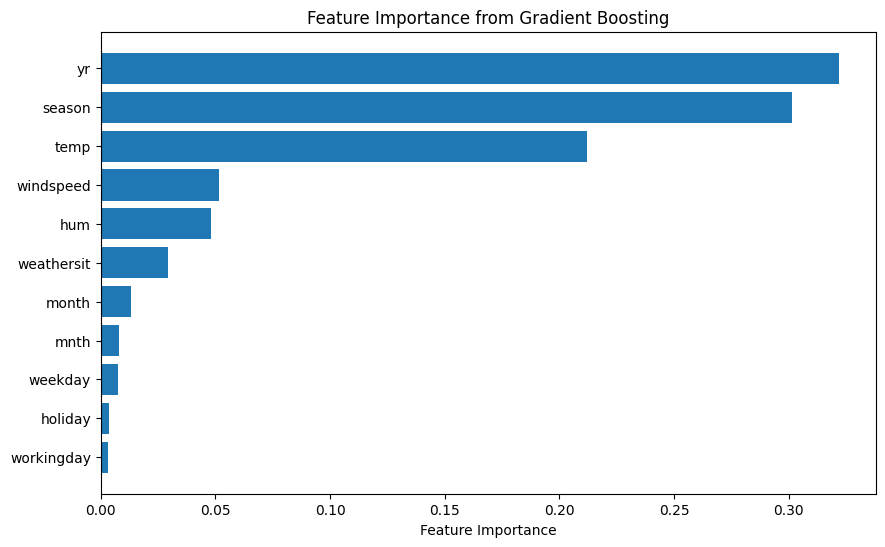

In [ ]:
#fit the model
model=GradientBoostingRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
#Get feature importances
importances=model.feature_importances_
feature_names=x_train.columns
# Create a DataFrame for better visualization
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Gradient Boosting")
plt.show()


In [ ]:
# Show top 10 features
print("Top 10 important features:")
print(feature_df.head(10))


Top 10 important features:
       Feature  Importance
1           yr    0.321840
0       season    0.301398
8         temp    0.212193
10   windspeed    0.051396
9          hum    0.048040
6   weathersit    0.029510
7        month    0.013042
2         mnth    0.007844
4      weekday    0.007662
3      holiday    0.003722


From above feature importance report it seems to be when weather is clear that is in spring and summer bike rental  count is high.


**Challenges** **Faced**


*  Data Analysis: using Seaborn and Matplotlib liabray tried with differnt charts.



*  Dimensionality Reduction:Deleting columns that highly correlated .




*  Weather conditions can change within a day, but only daily summaries are available. Hourly fluctuations are lost in the daily aggregation.


* Difficulty in modeling the impact of special events, holidays, or policy changes unless specifically encoded.

*  Tree-based models provide importance, but understanding true causal relationships can be challenging.  


